## Fraud Detection

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 

#### Dataset (from Kaggle)
* The dataset contains transactions made by credit cards in September 2013 by european cardholders.
* In this highly unbalanced dataset we have only 492 frauds out of 284,807 transactions. 
* Features V1, V2, … V28 are the principal components obtained with PCA.
* Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
* Feature 'Amount' is the transaction Amount.

#### Goal
Our goal is to identify fraudulent credit card transactions. Also we will try to increase the recall score. Recall score in this project is the number of correct 'fraud' predictions out of 'fraud' transactions.

In [3]:
filepath = 'data/creditcard.csv'
df = pd.read_csv(filepath)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


As we see most of our features(V1 - V28) are already normalized

In [7]:
Vfeatures = df.iloc[:,1:-2]
Vfeatures.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [271]:
from scipy.stats import skew

'skew before: {}, and after: {}'.format(skew(df['Amount']),skew(np.log1p(df['Amount'])))

'skew before: 16.97763503663315, and after: 0.16270207082889335'

Since the 'amount' column is highly skewed we will apply the logarithmic function to it's values

In [330]:
df['Amount Category'] = pd.cut(np.log1p(df['Amount']), bins = 10)

In [332]:
df['Amount Category'].value_counts(normalize=True)

2    0.222877
3    0.204086
4    0.177787
1    0.136752
0    0.128989
5    0.090542
6    0.031850
7    0.006352
8    0.000737
9    0.000028
Name: Amount Category, dtype: float64

Now we can encode the amount of money spent on the transaction

In [331]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Amount Category'] = le.fit_transform(df['Amount Category'])
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount Category
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,4
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4


#### Let's see the amount spent for each of our classes 

In [333]:
mask0 = (df['Class']==0) & (df['Amount']<500)
mask1 = (df['Class']==1) & (df['Amount']<500)

bins1 = np.geomspace(1,26000, num = 10) - 1

(array([[0.10303659, 0.02521609, 0.01595554, 0.00484993],
        [0.28970424, 0.02023101, 0.00516982, 0.00255533]]),
 array([ 0.        ,  2.09423001,  8.57425937, 28.62496068, 90.66644246]),
 <a list of 2 BarContainer objects>)

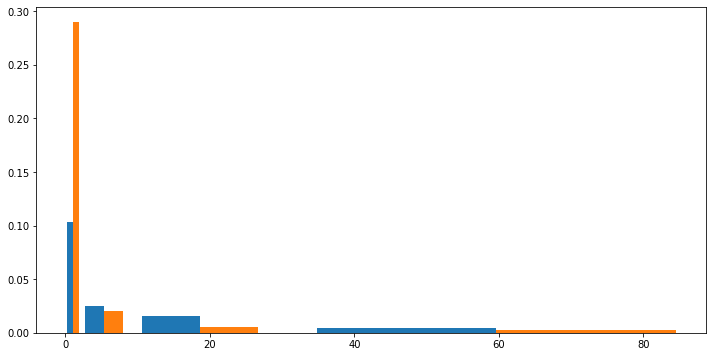

In [334]:
plt.figure(figsize=(12,6))

plt.hist([df[mask0]['Amount'], df[mask1]['Amount']], bins = bins1[0:5], density = True)

As we see for the most fraud transactions the amount of money was really small, while on the other hand non-fraud transactions had a more spreaded amount value

* X: Features
* y: Labels

In [335]:
X = df.iloc[:,1:].drop(columns = ['Amount', 'Class'])
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount Category
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,4
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4


In [336]:
y = df['Class']

We will use stratified split because we have an unbalanced dataset

In [337]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits = 2, test_size = 0.3, random_state = 42)

In [338]:
for train, test in sss.split(X,y):
    x_train, x_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

In [339]:
y_train.value_counts(normalize = True)

0    0.998275
1    0.001725
Name: Class, dtype: float64

In [340]:
y_test.value_counts(normalize = True)

0    0.998268
1    0.001732
Name: Class, dtype: float64

We kept the same proportion of fraud transactions in both train and test subsets

### Let's first build our models without resampling although we have imbalanced data

In [341]:
import matplotlib.pyplot as plt

def draw_confusion_matrix(confmatrix):
    _, ax = plt.subplots(figsize=(6,5))
    ax = sns.heatmap(confmatrix, annot=True, fmt='d', annot_kws={"size": 20, "weight": "bold"})  
    labels = ['Not Fraud', 'Fraud']
    ax.set_xticklabels(labels, fontsize=10);
    ax.set_yticklabels(labels, fontsize=10);
    ax.set_xlabel('Prediction', fontsize=15);
    ax.set_ylabel('Ground Truth', fontsize=15)
    

In [342]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDClassifier

#### KNN model

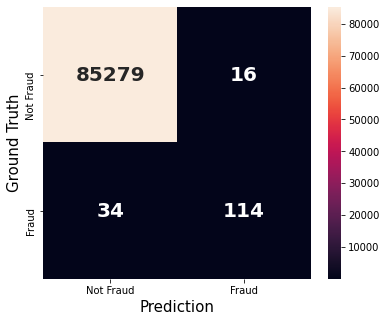

In [343]:
KNN_params = {'n_neighbors': [3, 5, 7, 9]}
KNN = KNeighborsClassifier()
gs_KNN = GridSearchCV(KNN, KNN_params, cv = 3, scoring = 'recall', n_jobs = -1).fit(x_train, y_train)
y_pred_KNN = gs_KNN.predict(x_test)

draw_confusion_matrix(confusion_matrix(y_test, y_pred_KNN))

In [344]:
score_KNN = [accuracy_score(y_test, y_pred_KNN), precision_score(y_test, y_pred_KNN), 
                      recall_score(y_test, y_pred_KNN), f1_score(y_test, y_pred_KNN)]
gs_KNN.best_params_

{'n_neighbors': 7}

#### Random Forest

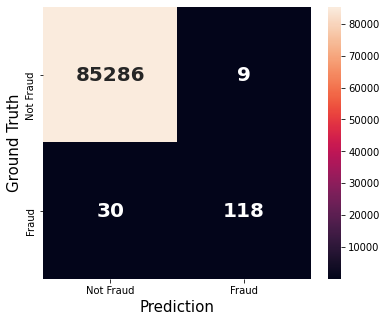

In [345]:
RF = RandomForestClassifier(warm_start = True, random_state = 42)
params = {'n_estimators':[25,50,100,150]}

gs_RF = GridSearchCV(RF, params, cv = 3, scoring = 'recall', n_jobs = -1).fit(x_train, y_train)
y_pred_RF = gs_RF.predict(x_test)

draw_confusion_matrix(confusion_matrix(y_test, y_pred_RF))

In [346]:
score_RF = [accuracy_score(y_test, y_pred_RF), precision_score(y_test, y_pred_RF), 
                      recall_score(y_test, y_pred_RF), f1_score(y_test, y_pred_RF)]
gs_RF.best_params_

{'n_estimators': 150}

### Now let's try to predict our model after resampling our data

In [347]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

SmoteTomek - SMOTE will be applied to increase the number of the minority samples of class 1 and Tomek will be used to remove noisy samples.

In [348]:
smote = SMOTE(sampling_strategy = 0.1)  # increase the minority class to a 1:10 ratio
tomek = TomekLinks(sampling_strategy = 'majority', n_jobs = -1)

smt = SMOTETomek(sampling_strategy = 'all', smote = smote, tomek = tomek, n_jobs = -1)
X_smt, y_smt = smt.fit_sample(x_train, y_train)

In [349]:
y_smt.value_counts()

0    199019
1     19902
Name: Class, dtype: int64

#### KNN

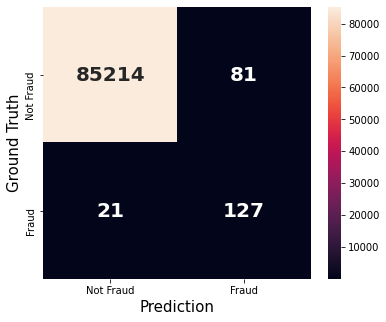

In [350]:
KNN_params = {'n_neighbors': [3, 5, 7, 9]}

KNN = KNeighborsClassifier()
gs_KNNr = GridSearchCV(KNN, KNN_params, cv = 3, scoring = 'recall', n_jobs = -1).fit(X_smt, y_smt)
y_pred_KNNr = gs_KNNr.predict(x_test)
y_prob_KNNr = gs_KNNr.predict_proba(x_test)

draw_confusion_matrix(confusion_matrix(y_test, y_pred_KNNr))

In [351]:
score_KNNr = [accuracy_score(y_test, y_pred_KNNr), precision_score(y_test, y_pred_KNNr), 
                      recall_score(y_test, y_pred_KNNr), f1_score(y_test, y_pred_KNNr)]
gs_KNNr.best_params_

{'n_neighbors': 3}

#### Random Forest

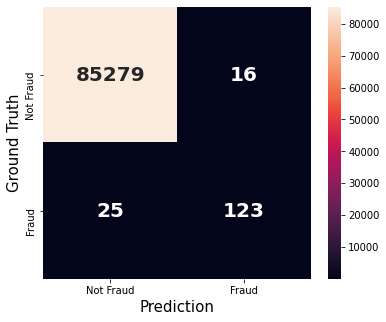

In [352]:
RF_ = RandomForestClassifier(warm_start = True, random_state = 42)
params = {'n_estimators':[10, 15, 25, 50]}

gs_RFr = GridSearchCV(RF_, params, cv = 3, scoring = 'recall', n_jobs = -1).fit(X_smt, y_smt)
y_pred_RFr = gs_RFr.predict(x_test)
y_prob_RFr = gs_RFr.predict_proba(x_test)

draw_confusion_matrix(confusion_matrix(y_test, y_pred_RFr))

In [353]:
score_RFr = [accuracy_score(y_test, y_pred_RFr), precision_score(y_test, y_pred_RFr), 
                      recall_score(y_test, y_pred_RFr), f1_score(y_test, y_pred_RFr)]
gs_RFr.best_params_

{'n_estimators': 50}

#### Nystroem +  SGD

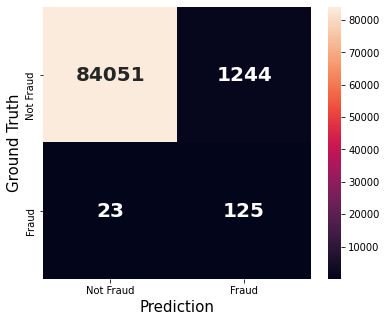

In [354]:
nyst = Nystroem()
x_trans = nyst.fit_transform(X_smt)

sgd = SGDClassifier(n_jobs = -1).fit(x_trans, y_smt)
y_pred_SGD = sgd.predict(nyst.transform(x_test))

draw_confusion_matrix(confusion_matrix(y_test, y_pred_SGD))

In [355]:
score_sgd = [accuracy_score(y_test, y_pred_SGD), precision_score(y_test, y_pred_SGD), 
                      recall_score(y_test, y_pred_SGD), f1_score(y_test, y_pred_SGD)]

#### Finally let's try to use a voting classifier to predict the labels

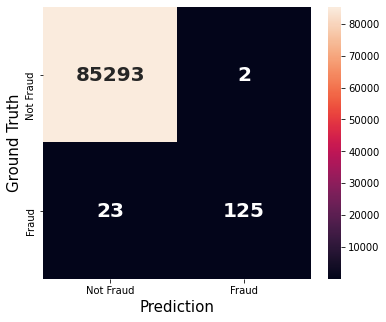

In [356]:
from sklearn.ensemble import VotingClassifier

estimators = [('KNN',gs_KNNr),('RF',gs_RFr)]
VC = VotingClassifier(estimators, voting = 'soft', n_jobs = -1).fit(x_test, y_test)
y_pred_VCr = VC.predict(x_test)

draw_confusion_matrix(confusion_matrix(y_test, y_pred_VCr))

In [357]:
score_VCr = [accuracy_score(y_test, y_pred_VCr), precision_score(y_test, y_pred_VCr), 
                      recall_score(y_test, y_pred_VCr), f1_score(y_test, y_pred_VCr)]

### And the scores for each of our models

In [358]:
arrays = [['no resampling',' ','resampling',' ',' ',' '],['knn','rf','knn','rf', 'Nystroem + SGD','Voting classifier(Knn + rf)']]

sc = pd.DataFrame([score_KNN, score_RF,score_KNNr, score_RFr, score_sgd, score_VCr], index = arrays).T
sc.rename(index = {0:'accuracy', 1:'precision',  2:'recall', 3:'f1_score'}, inplace = True)
sc = round(sc,4)
sc

no resampling         resampling                         \
                    knn      rf        knn      rf Nystroem + SGD   
accuracy         0.9994  0.9995     0.9988  0.9995         0.9852   
precision        0.8769  0.9291     0.6106  0.8849         0.0913   
recall           0.7703  0.7973     0.8581  0.8311         0.8446   
f1_score         0.8201  0.8582     0.7135  0.8571         0.1648   

                                       
          Voting classifier(Knn + rf)  
accuracy                       0.9997  
precision                      0.9843  
recall                         0.8446  
f1_score                       0.9091

#### Key findings
* The best recall score is achieved when we used the Nystroem + SGD model. But in that case we did really poorly on the other metrics.  
* As we can see using the Voting Classifier(soft voting) with the K-Nearest-Neighbors and Random Forests models for our final labeling, has increased significantly our precision and the f1-score, while recall remains the same. 
* Also, we can notice that after resampling our data we increased the recall score which was our main objective for this project

All in all, the best model can be chosen based on the objectives of each project. As I said before our main goal in this kind of project was to increase the recall score while keeping the f1-score in rational levels which is achieved using resampling and a voting classifier (with KNN and RF).